In [18]:
import pandas as pd
import numpy as np
%matplotlib inline

df= pd.read_csv('births.csv', index_col='Date',parse_dates=True)
df.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [23]:
X_t=df[:-10]['Births'] - df['Births'].mean()
X_t.head()

Date
1959-01-01    -6.980822
1959-01-02    -9.980822
1959-01-03   -11.980822
1959-01-04   -10.980822
1959-01-05     2.019178
Name: Births, dtype: float64

In [24]:
X_t_one = df[10:]['Births'] - df['Births'].mean()
X_t_one.head()

Date
1959-01-11    -3.980822
1959-01-12    -8.980822
1959-01-13    13.019178
1959-01-14     5.019178
1959-01-15     3.019178
Name: Births, dtype: float64

In [25]:
X_covar = X_t.values * X_t_one.values
X_covar

array([ 2.77894089e+01,  8.96359842e+01, -1.55980454e+02, -5.51147007e+01,
        6.09625821e+00,  6.46551623e+01,  2.42113267e+01,  1.03872396e+00,
        3.90447739e+00, -1.50095523e+02,  3.17702308e+01, -9.89612760e+01,
       -3.88078514e+01, -5.00955226e+01, -1.50379884e+01, -5.07634453e+00,
       -2.39037418e+01, -7.11470069e+00, -1.98045412e+00, -3.98845637e+01,
        1.43501738e+02, -2.09153057e+02,  3.27318746e+01, -2.01530569e+01,
        1.98277651e+01,  8.17297054e+00,  1.18661212e+01, -6.29612760e+01,
       -2.21722349e+01,  4.37126966e+01, -1.62172235e+02,  1.13520916e+02,
       -3.31530569e+01,  1.82113267e+01,  3.17702308e+01,  8.03455733e+01,
       -1.99804541e+01,  2.72305048e+01, -4.41338788e+01,  3.27318746e+01,
        5.42880390e+01,  2.97894089e+01, -2.10763445e+01,  9.03647514e+01,
       -1.53056859e-01,  3.02496829e+01, -1.49612760e+01, -1.50379884e+01,
       -4.81530569e+01,  2.08085870e+01, -8.41530569e+01, -1.50379884e+01,
        5.57126966e+01, -

In [26]:
X_covar = X_covar.sum() * (1 / len(df))
X_covar

2.5747994560649015

In [27]:
df['Births'].var()

53.996883937979796

In [28]:
X_covar / df['Births'].var()

0.047684223019652146

In [29]:
from statsmodels.tsa.stattools import acf, acovf

In [30]:
acf(df)

C:\Users\night\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


array([ 1.        ,  0.21724118,  0.15287758,  0.10821254,  0.09066059,
        0.09595481,  0.09104012,  0.19508071,  0.14115295,  0.06117859,
        0.04781522,  0.04770662, -0.01964707,  0.02287422,  0.08112657,
        0.11185686,  0.07333732,  0.01501845,  0.07270333,  0.06859   ,
        0.09280107,  0.26386846,  0.14012147,  0.06070286,  0.08716232,
        0.05038825,  0.0650489 ,  0.11466565,  0.1552232 ,  0.12850638,
        0.10358981,  0.09734643,  0.04912286,  0.04022798,  0.05838555,
        0.05359812,  0.10151053,  0.08268663,  0.0912185 ,  0.11192192,
        0.05652846])

In [31]:
acovf(df)

C:\Users\night\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:354: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


array([ 5.38489473e+01,  1.16982088e+01,  8.23229673e+00,  5.82713152e+00,
        4.88197758e+00,  5.16706571e+00,  4.90241467e+00,  1.05048907e+01,
        7.60093771e+00,  3.29440264e+00,  2.57479946e+00,  2.56895120e+00,
       -1.05797419e+00,  1.23175271e+00,  4.36858038e+00,  6.02337389e+00,
        3.94913756e+00,  8.08727475e-01,  3.91499781e+00,  3.69349934e+00,
        4.99724012e+00,  1.42090387e+01,  7.54539348e+00,  3.26878523e+00,
        4.69359939e+00,  2.71335443e+00,  3.50281486e+00,  6.17462470e+00,
        8.35860568e+00,  6.91993325e+00,  5.57820208e+00,  5.24200292e+00,
        2.64521452e+00,  2.16623434e+00,  3.14400027e+00,  2.88620230e+00,
        5.46623507e+00,  4.45258797e+00,  4.91202026e+00,  6.02687757e+00,
        3.04399797e+00,  1.64067927e+00,  6.55010968e+00,  6.42640066e+00,
        2.55195416e+00,  4.04873679e+00,  1.02097072e+00,  1.50300387e+00,
        2.00732262e+00,  4.81021897e+00,  1.10884810e+00,  1.89767801e+00,
       -1.26907848e+00,  

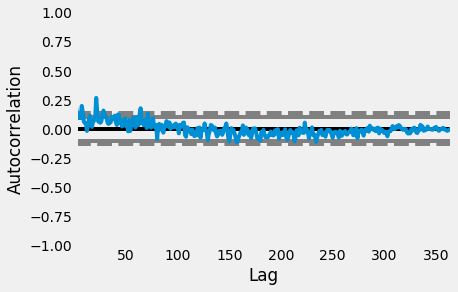

In [32]:
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
plt.style.use('fivethirtyeight')

autocorrelation_plot(df);

In [33]:
data['Passengers'].head()

NameError: name 'data' is not defined